**Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.**

**Data Description:**

*The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers*

**ID --Unique ID**

**Balance--Number of miles eligible for award travel**

**Qual_mile--Number of miles counted as qualifying for Topflight status**

**cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:**

**cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:**

**cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:**


1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

**Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months**

**Bonus_trans--Number of non-flight bonus transactions in the past 12 months**

**Flight_miles_12mo--Number of flight miles in the past 12 months**

**Flight_trans_12--Number of flight transactions in the past 12 months**

**Days_since_enrolled--Number of days since enrolled in flier program**

**Award--whether that person had award flight (free flight) or not**

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
airl_data=pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)

In [3]:
airl=airl_data.copy()
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EXPLORATORY DATA ANALYSIS

In [4]:
airl.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airl.shape

(3999, 12)

In [6]:
airl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Removing unwanted column
df=airl.copy()
df =df.drop(columns=['ID#'])
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0



## STANDARDIZING VALUES

In [8]:
from sklearn.preprocessing import StandardScaler
std_df=StandardScaler().fit(df).transform(df)
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## NORMALIZING VALUES

In [9]:
from sklearn.preprocessing import MinMaxScaler
norm_df =MinMaxScaler().fit(df).transform(df)
norm_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# Building Hierarchical Model On Standardized Data

## Calculating Distance And Generating Dendrogram 

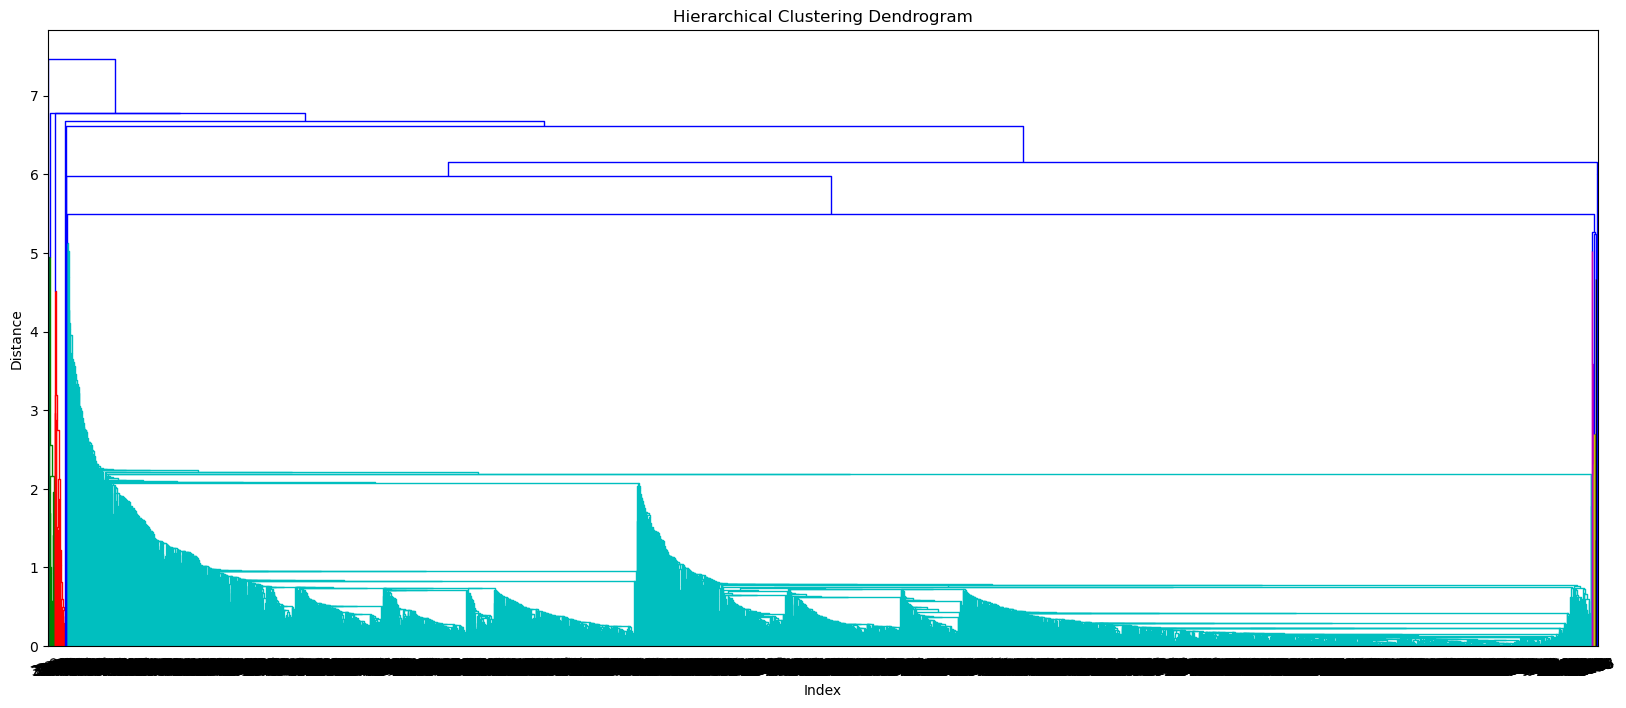

In [10]:
import scipy.cluster.hierarchy as sch
z=sch.linkage(std_df,method='single',metric='euclidean')
plt.figure(figsize=(20, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.style.use('classic')
sch.dendrogram(
    z,
    leaf_rotation=15.,  # rotates the x axis labels
    leaf_font_size=10.,# font size for the x axis labels
    #orientation='left'
)
plt.show()     

## AGGLOMERATIVE CLUSTERING

In [11]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=7, linkage='single',affinity = "euclidean").fit(std_df) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airl['h_cluster_std']=cluster_labels # creating a  new column and assigning it to new column 
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [12]:
airl.iloc[:,1:].groupby(airl.h_cluster_std).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
h_cluster_std,,,,,,,,,,,,
0,1.226280e+05,296.000000,3.000000,1.0,1.000000,63527.666667,63.666667,16341.000000,48.000000,2476.000000,1.000000,0.0
1,7.779364e+04,0.000000,1.214286,2.0,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857,1.0
2,7.301257e+04,145.297722,2.069114,1.0,1.011646,17115.680759,11.466582,437.442278,1.309114,4121.098987,0.369367,2.0
3,1.601140e+05,500.000000,1.000000,1.0,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000,3.0
4,1.704838e+06,0.000000,1.000000,1.0,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000,4.0
5,7.375140e+05,0.000000,3.000000,1.0,4.000000,43993.000000,40.000000,2150.000000,7.000000,5030.000000,0.000000,5.0
6,5.223140e+04,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000,6.0


In [13]:
# Data points in cluster 0
data=airl[airl.h_cluster_std==0]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,0
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,0
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,0


In [14]:
# Data points in cluster 1
data=airl[airl.h_cluster_std==1]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,1
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,1
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,1
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,1
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,1
1383,1397,18154,0,1,2,1,7748,16,0,0,5310,1,1
1389,1403,49145,0,1,2,1,12755,22,2450,7,5323,0,1
1527,1542,23965,0,1,2,1,7308,16,550,3,5003,0,1
1541,1556,36887,0,1,2,1,9048,11,0,0,4951,0,1


In [15]:
# Data points in cluster 2
data=airl[airl.h_cluster_std==2]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [16]:
# Data points in cluster 3
data=airl[airl.h_cluster_std==3]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3


In [17]:
# Data points in cluster 4
data=airl[airl.h_cluster_std==4]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,4


In [18]:
# Data points in cluster 5
data=airl[airl.h_cluster_std==5]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,5


In [19]:
# Data points in cluster 6
data=airl[airl.h_cluster_std==6]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,6
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,6
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,6
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,6
1791,1808,32510,0,1,3,1,14568,13,0,0,4341,0,6
1918,1935,52139,0,1,3,1,16314,14,250,1,3965,0,6
2047,2064,4148,0,1,3,1,13504,18,0,0,4607,1,6
2166,2183,100634,0,1,3,1,69669,28,1540,12,4193,1,6
2278,2296,30171,0,1,3,1,15370,13,0,0,3853,0,6
2978,3000,22805,0,1,3,1,26334,27,1800,6,3294,1,6


### Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score
sc_hc_std=silhouette_score(df,cluster_labels)
sc_hc_std

-0.31785379633815475

**Since, cluster- 3,4,5 has only a single record and silhoette score is very close to 0 and also the dendrogram is too complex to understand and analyse, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# Building Hierarchical Model On NormalizedData

## Calculating Distance And Generating Dendrogram 

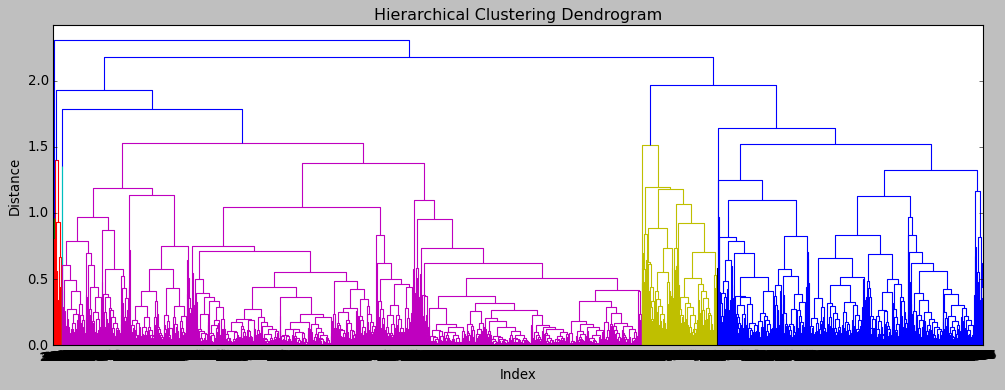

In [21]:
z=sch.linkage(norm_df,method='complete',metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.style.use('classic')
sch.dendrogram(
    z,
    leaf_rotation=6.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()     

## AGGLOMERATIVE CLUSTERING

In [22]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=8, linkage='complete',affinity = "euclidean").fit(std_df) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airl['h_cluster_norm']=cluster_labels # creating a  new column and assigning it to new column 
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [23]:
airl.iloc[:,1:].groupby(airl.h_cluster_norm).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
h_cluster_norm,,,,,,,,,,,,,
0,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143,2.071429,0.0
1,65678.996818,112.333068,2.033148,1.000000,1.000796,15572.670910,10.710687,267.476266,0.809069,4068.569345,0.348979,2.000000,1.0
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.200000,2.0
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,0.750000,3.0
4,131528.147541,348.180328,2.565574,1.000000,1.000000,37762.426230,29.983607,5375.065574,15.581967,4950.565574,0.803279,2.000000,4.0
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,2.744186,5.0
6,142376.181818,8720.727273,2.181818,1.000000,1.000000,15125.363636,15.454545,1336.454545,4.000000,5349.363636,0.818182,2.000000,6.0
7,180579.200000,0.000000,4.200000,1.000000,1.000000,225128.000000,26.400000,2103.000000,4.800000,4930.800000,1.000000,2.000000,7.0


In [24]:
# Data points in cluster 0
data=airl[airl.h_cluster_norm==0]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,2,0
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,2,0
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,2,0
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,2,0
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,2,0
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,2,0
175,178,451673,0,4,1,1,43533,19,900,4,7575,1,2,0
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,2,0
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,2,0
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,4,0


In [25]:
# Data points in cluster 1
data=airl[airl.h_cluster_norm==1]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [26]:
# Data points in cluster 2
data=airl[airl.h_cluster_norm==2]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,2,2
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,2,2
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,2,2
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,2,2
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,2,2
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,2,2
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,5,2
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,2,2
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,2,2
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,2,2


In [27]:
# Data points in cluster 3
data=airl[airl.h_cluster_norm==3]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,0,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,0,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,0,3


In [28]:
# Data points in cluster 4
data=airl[airl.h_cluster_norm==4]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,2,4
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,2,4
59,60,95118,0,3,1,1,23188,23,2200,7,6865,1,2,4
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,2,4
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,3829,122488,0,1,1,1,2800,17,1300,16,1718,1,2,4
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,2,4
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2,4
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2,4


In [29]:
# Data points in cluster 5
data=airl[airl.h_cluster_norm==5]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1,5
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,6,5
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,1,5
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,6,5
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,1,5
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,1,5
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,1,5
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,6,5
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,1,5
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,6,5


In [30]:
# Data points in cluster 6
data=airl[airl.h_cluster_norm==6]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
420,426,529886,7210,1,1,1,23866,26,7741,15,8296,1,2,6
589,596,133445,8264,1,1,1,3375,13,0,0,6492,1,2,6
833,843,114932,8559,1,1,1,3150,13,1650,12,6092,1,2,6
896,907,218763,8753,1,1,1,11650,6,1150,3,5975,0,2,6
901,912,172110,9325,5,1,1,21382,23,950,3,5944,1,2,6
1177,1189,32214,11148,3,1,1,12717,10,0,0,5576,1,2,6
1220,1233,40965,10098,1,1,1,9850,11,1850,6,5429,1,2,6
1337,1350,128664,8019,4,1,1,44298,16,50,1,5155,1,2,6
1545,1560,132132,6920,3,1,1,20443,18,1310,4,3916,1,2,6
2436,2455,21875,7558,3,1,1,12398,15,0,0,3299,1,2,6


In [31]:
# Data points in cluster 7
data=airl[airl.h_cluster_norm==7]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm
190,194,123516,0,5,1,1,240544,31,500,2,7507,1,2,7
380,385,377252,0,5,1,1,230629,30,6393,13,6996,1,2,7
534,540,267404,0,5,1,1,263685,51,3000,6,6584,1,2,7
2840,2862,8557,0,1,1,1,200622,5,622,3,1955,1,2,7
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,2,7


### Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score
sc_hc_norm=silhouette_score(df,cluster_labels)
sc_hc_norm

0.013264552738068917

**Since, silhoette score is very close to 0 and also the dendrogram is too complex to understand and analyse, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING K-MEANS CLUSTERING MODEL On Standardized Data

## APPLYING ELBOW CURVE TO OBTAIN OPTIMAL K-VALUE

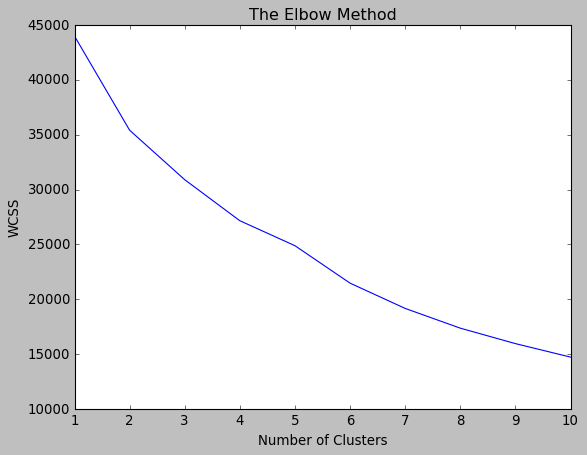

In [33]:
from sklearn.cluster import KMeans
#fig = plt.figure(figsize=(8,5))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i).fit(std_df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [34]:
clf = KMeans(n_clusters=2)
y_kmeans = clf.fit_predict(std_df)  
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
clf.inertia_

35409.51662986132

In [36]:
WCSS

[43989.0,
 35409.51662986132,
 30899.246824652186,
 27161.39095298956,
 24884.156958821182,
 21471.27905751547,
 19167.347991870134,
 17369.03685502537,
 15960.097526710195,
 14732.229882347434]

In [37]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
airl['kmeans_cluster_std']=md # creating a  new column and assigning it to new column 
airl 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1,1


In [38]:
airl.iloc[:,1:].groupby(airl.kmeans_cluster_std).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std
kmeans_cluster_std,,,,,,,,,,,,,,
0,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909,2.008449,1.339478,0.0
1,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897,2.007786,1.065258,1.0


### Silhouette Score

In [39]:
sc_kmeans_std=silhouette_score(df,clf.labels_)
sc_kmeans_std

0.34333332585159393

**Since, there is lot of hetrogenity in the clusters as there are only 2 clusters and silhoette score is close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING K-MEANS CLUSTERING MODEL On Normalized Data

## APPLYING ELBOW CURVE TO OBTAIN OPTIMAL K-VALUE

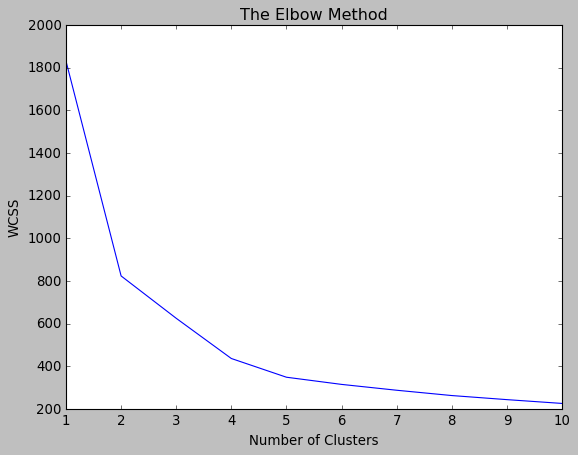

In [40]:
#fig = plt.figure(figsize=(8,5))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i).fit(norm_df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [41]:
clf = KMeans(n_clusters=2)
y_kmeans = clf.fit_predict(norm_df)  
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
clf.inertia_

823.6756984125205

In [43]:
WCSS

[1830.7932128584118,
 823.6756984125205,
 625.1768205797016,
 436.7088576193261,
 348.9434283901319,
 315.3155964842891,
 287.9286604546838,
 263.0478301272149,
 243.9155660366876,
 226.11087772797785]

In [44]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
airl['kmeans_cluster_norm']=md # creating a  new column and assigning it to new column 
airl 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1,1,0


In [45]:
airl.iloc[:,1:].groupby(airl.kmeans_cluster_norm).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm
kmeans_cluster_norm,,,,,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,2.008737,1.075060,0.849484,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,2.006752,1.289669,0.376772,1.0


### Silhouette Score

In [46]:
sc_kmeans_norm=silhouette_score(df,clf.labels_)
sc_kmeans_norm

0.12945774208664765

**Since, there is lot of hetrogenity in the clusters as there are only 2 clusters and silhoette score is close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING DBSCAN CLUSTERING MODEL On Normalized Data

## ESTIMATING EPS & MINPTS

(0.0, 7.0)

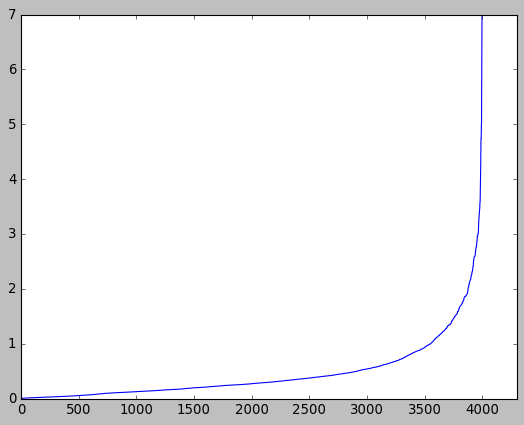

In [47]:
from sklearn.neighbors import NearestNeighbors
#n_neighbors=2*no.of columns
neigh=NearestNeighbors(n_neighbors=22).fit(std_df)

distances,indices = neigh.kneighbors(std_df)

distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim([0,4300])
plt.ylim([0,7])

In [48]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.8,min_samples=12).fit(std_df)
dbs.labels_ #-1 is the label of the nosiy samples

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
airl['dbscan_cluster']=dbs.labels_
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm,dbscan_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1,1,0,0


In [50]:
# Use pandas filtering and get noisy datapoints -1
airl[airl['dbscan_cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm,dbscan_cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0,1,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1,5,0,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2,1,0,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,2,1,0,1,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,2,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2,1,0,0,-1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2,1,0,1,-1
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2,1,1,0,-1
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2,1,0,0,-1


In [51]:
airl.iloc[:,1:].groupby(airl.dbscan_cluster).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm,dbscan_cluster
dbscan_cluster,,,,,,,,,,,,,,,,
-1,153643.480331,592.975155,2.685300,1.060041,1.050725,34663.012422,19.590062,1587.557971,4.595238,4655.547619,0.628364,2.033126,1.639752,0.327122,0.628364,-1.0
0,46273.354430,0.703235,1.556493,1.000000,1.000000,7397.959212,7.789498,80.463197,0.279419,3753.015940,0.000000,2.000000,1.000000,0.911861,0.000000,0.0
1,47313.197320,2.436054,2.347138,1.000000,1.000000,17414.952497,11.605359,157.247259,0.532278,4338.215591,1.000000,2.000000,1.000000,0.531060,1.000000,1.0
2,88517.735849,0.000000,5.000000,1.000000,1.000000,64327.037736,17.735849,80.301887,0.339623,5806.056604,1.000000,2.000000,1.000000,0.000000,1.000000,2.0
3,143829.166667,0.000000,5.000000,1.000000,1.000000,62086.083333,16.083333,58.166667,0.166667,5285.250000,0.000000,2.000000,1.000000,0.000000,0.000000,3.0
4,139251.214286,0.000000,5.000000,1.000000,1.000000,60420.071429,14.000000,35.714286,0.071429,2489.857143,0.000000,2.000000,1.000000,0.000000,0.000000,4.0


### Silhouette Score

In [52]:
sc_dbscan_std=silhouette_score(df,airl['dbscan_cluster'])
sc_dbscan_std

-0.1325523933712302

**Since, silhoette score is close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING DBSCAN CLUSTERING MODEL On Standardized Data

## ESTIMATING EPS & MINPTS

(0.0, 0.8)

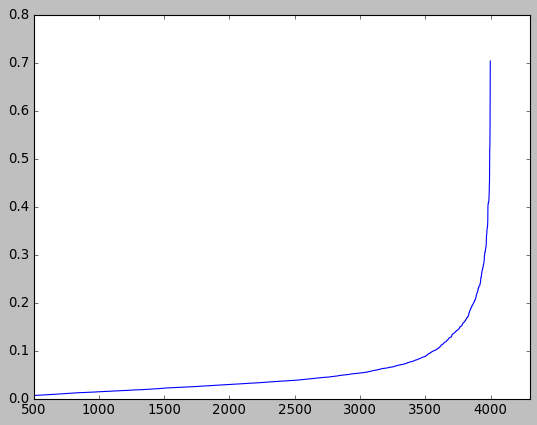

In [53]:
#n_neighbors=2*no.of columns
neigh=NearestNeighbors(n_neighbors=22).fit(norm_df)

distances,indices = neigh.kneighbors(norm_df)

distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim([500,4300])
plt.ylim([0,0.8])

In [54]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.18,min_samples=12).fit(norm_df)
dbs.labels_ #-1 is the label of the nosiy samples

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [55]:
airl['dbscan_cluster']=dbs.labels_
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm,dbscan_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1,1,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,1,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1,1,0,0


In [56]:
# Use pandas filtering and get noisy datapoints -1
airl[airl['dbscan_cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm,dbscan_cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1,5,0,1,-1
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,2,0,0,1,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,2,4,0,1,-1
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,2,1,0,0,-1
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,2,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,3925,13004,1000,1,1,1,13890,39,0,0,1572,1,2,1,0,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2,1,0,0,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2,4,0,0,-1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2,4,1,0,-1


In [57]:
airl.iloc[:,1:].groupby(airl.dbscan_cluster).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm,dbscan_cluster
dbscan_cluster,,,,,,,,,,,,,,,,
-1,200433.836806,1404.739583,2.638889,1.201389,1.170139,44661.697917,25.135417,2742.329861,8.177083,4670.302083,0.677083,2.111111,2.791667,0.218750,0.677083,-1.0
0,37536.760024,38.904249,1.000000,1.000000,1.000000,2383.280670,5.535009,205.399162,0.605625,3564.819868,0.000000,2.000000,1.014363,0.998205,0.000000,0.0
1,81944.561594,76.652174,4.000000,1.000000,1.000000,40308.757246,18.985507,373.536232,1.144928,4747.840580,1.000000,2.000000,1.018116,0.000000,1.000000,1.0
2,86944.110410,8.252366,3.000000,1.000000,1.000000,18826.659306,15.757098,146.435331,0.422713,4152.318612,0.000000,2.000000,1.018927,0.788644,0.000000,2.0
3,65451.770492,116.547131,1.000000,1.000000,1.000000,6101.483607,7.227459,648.500000,2.012295,4302.743852,1.000000,2.000000,1.073770,0.887295,1.000000,3.0
4,65906.909774,41.203008,3.000000,1.000000,1.000000,20474.112782,16.575188,311.548872,0.819549,4454.214286,1.000000,2.000000,1.056391,0.127820,1.000000,4.0
5,66226.456647,13.028902,2.000000,1.000000,1.000000,10001.410405,13.872832,105.005780,0.294798,4199.040462,0.000000,2.000000,1.000000,0.982659,0.000000,5.0
6,128569.073620,28.607362,5.000000,1.000000,1.000000,72320.423313,20.423313,419.263804,1.368098,5451.331288,1.000000,2.000000,1.061350,0.000000,1.000000,6.0
7,129718.000000,14.793103,4.000000,1.000000,1.000000,37657.669951,17.482759,218.083744,0.576355,4728.206897,0.000000,2.000000,1.000000,0.024631,0.000000,7.0


### Silhouette Score

In [58]:
sc_dbscan_norm=silhouette_score(df,airl['dbscan_cluster'])
sc_dbscan_norm

-0.08925080166726738

**The model with highest Silhouette Score is the best model**

***Comparing Silhouette Scores of all Models***

In [59]:
d = {"MODEL":pd.Series(['Hierarchical Clustering','K-Means Clustering','DBSCAN']),
     'No.of Clusters for Standardized data':pd.Series([7,2,6]),
     'No.of Clusters for Normalized data':pd.Series([8,2,11]),
        "Silhouette Scores on Standardized Data":pd.Series([sc_hc_std,sc_kmeans_std,sc_dbscan_std]),
        "Silhouette Scores on Normalized Data":pd.Series([sc_hc_norm,sc_kmeans_norm,sc_dbscan_norm])}
table=pd.DataFrame(d)
table 

,MODEL,No.of Clusters for Standardized data,No.of Clusters for Normalized data,Silhouette Scores on Standardized Data,Silhouette Scores on Normalized Data
0,Hierarchical Clustering,7,8,-0.317854,0.013265
1,K-Means Clustering,2,2,0.343333,0.129458
2,DBSCAN,6,11,-0.132552,-0.089251


**From the above comparision table:**
### Best Method: K-Means Clustering on Normalized Data
### No. of Clusters: 2